Missing values in data:
 Size        0
Location    0
Rooms       0
Price       0
dtype: int64


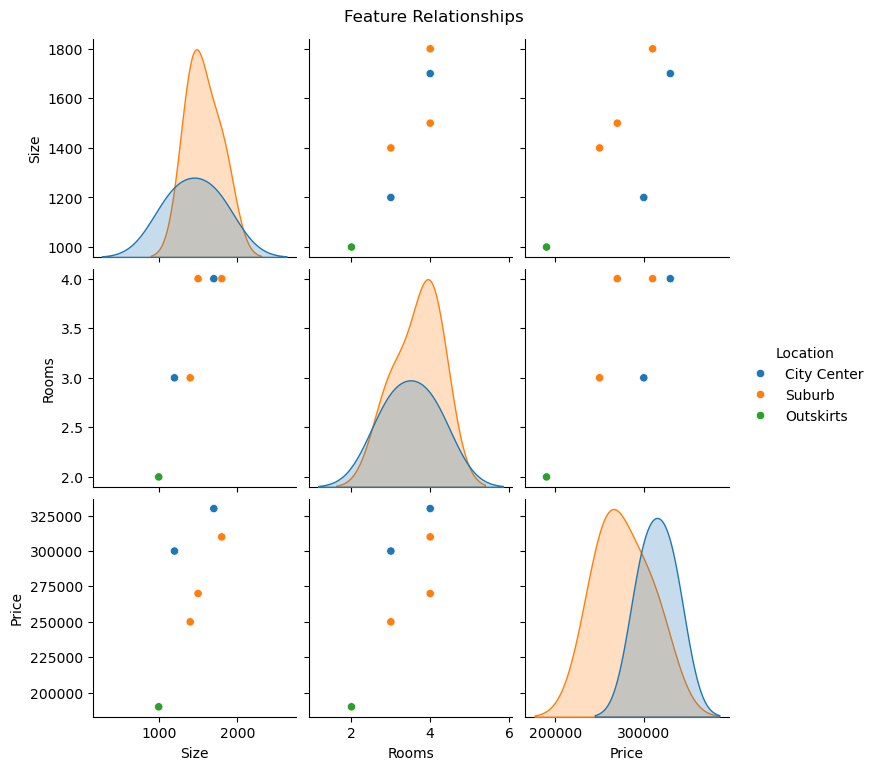

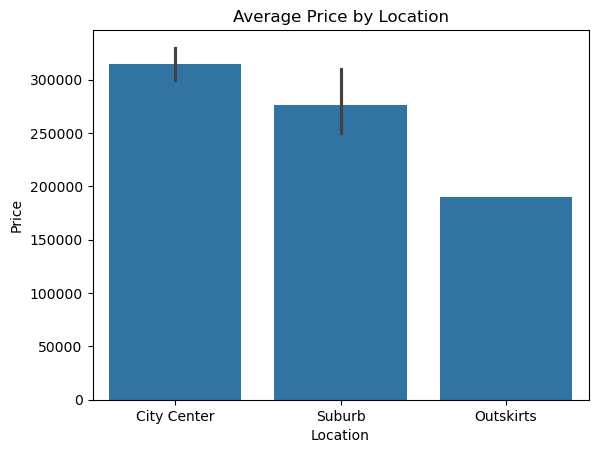

Linear Regression:
R² Score: -0.02739989886068095
RMSE: 30408.22107546926
Random Forest:
R² Score: 0.5763888888888888
RMSE: 19525.624189766637


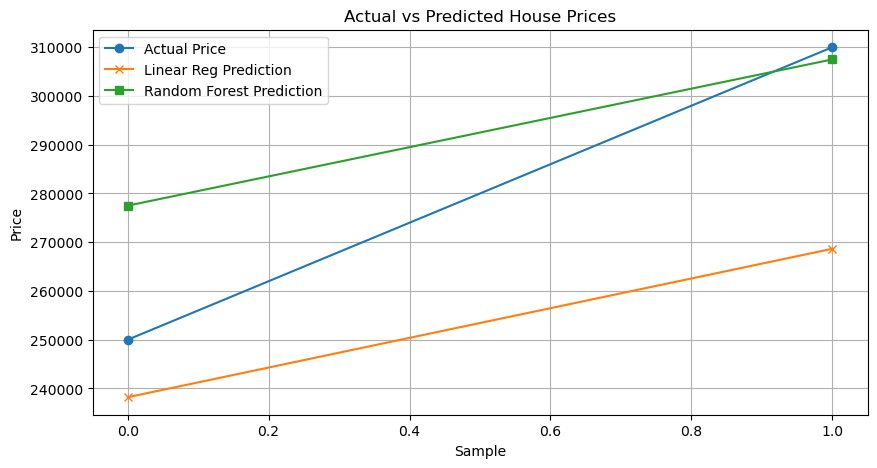

In [5]:
# Step 1: Basic Libraries Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
# Step 2: Sample Dataset 
data = pd.DataFrame({
    'Size': [1200, 1500, 1800, 1000, 1700, 1400],
    'Location': ['City Center', 'Suburb', 'Suburb', 'Outskirts', 'City Center', 'Suburb'],
    'Rooms': [3, 4, 4, 2, 4, 3],
    'Price': [300000, 270000, 310000, 190000, 330000, 250000]
})
# Step 3: Data Check
print("Missing values in data:\n", data.isnull().sum())
data.drop_duplicates(inplace=True)
# Step 4: Quick Visual Check
sns.pairplot(data, hue='Location')
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

sns.barplot(x='Location', y='Price', data=data)
plt.title("Average Price by Location")
plt.show()
# Step 5: Splitting Features and Target
X = data[['Size', 'Location', 'Rooms']]
y = data['Price']

# Categorical and numerical columns
cat_cols = ['Location']
num_cols = ['Size', 'Rooms']

# Encoding + Scaling
transformer = ColumnTransformer([
    ('loc_encoder', OneHotEncoder(drop='first'), cat_cols),
    ('num_scaler', StandardScaler(), num_cols)
])
# Step 6: Split the Data into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Step 7: Linear Regression Model
linear_model = Pipeline([
    ('preprocessing', transformer),
    ('lr', LinearRegression())
])

linear_model.fit(X_train, y_train)
pred_lr = linear_model.predict(X_test)

print("Linear Regression:")
print("R² Score:", r2_score(y_test, pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_lr)))
# Step 8: Random Forest Model
rf_model = Pipeline([
    ('preprocessing', transformer),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=0))
])

rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)

print("Random Forest:")
print("R² Score:", r2_score(y_test, pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_rf)))
# Step 9: Plotting Predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Price", marker='o')
plt.plot(pred_lr, label="Linear Reg Prediction", marker='x')
plt.plot(pred_rf, label="Random Forest Prediction", marker='s')
plt.legend()
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Sample")
plt.ylabel("Price")
plt.grid(True)
plt.show()
